<a href="https://colab.research.google.com/github/SarahY89/FRAUD-ANALYSIS/blob/main/Healthcare_Insurance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import warnings
warnings.filterwarnings(action='ignore')

# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

# Model training libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
from imblearn.under_sampling import NearMiss               # Undersampling
from imblearn.over_sampling import RandomOverSampler       # Oversampling
from imblearn.combine import SMOTETomek                    # Both Undersampling & Oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Exploratory Data Analysis

In [2]:
health_insurance = pd.read_csv('/content/insurance.csv')
health_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_10, *['region'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_11, *[[['age', 'bmi'], ['bmi', 'children'], ['children', 'charges']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_12, *['sex', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_13, *['smoker', 'region'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['age', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['age', 'smoker'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_16, *['age', 'region'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_17, *['bmi', 'sex'], **{'inner': 'stick'})
chart

In [3]:
health_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#checking for missing variables
health_insurance.isnull().sum()
# There is no missing variables

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

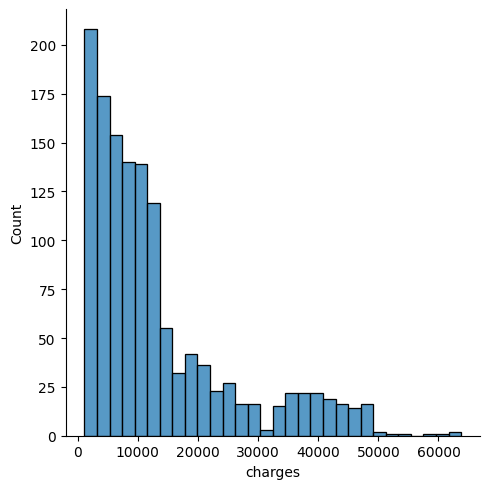

In [5]:
skewed = sns.displot(health_insurance['charges']) #Charges is right-skewed
skewed

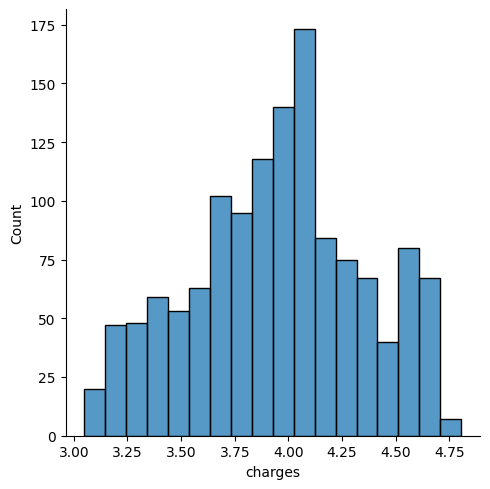

In [6]:
log_trans = sns.displot(np.log10(health_insurance['charges'])) #skewness is corrected using log
log_trans

In [7]:
#CHARGES BY REGION
charges = health_insurance['charges'].groupby(health_insurance['region']).sum().sort_values(ascending = True)
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

In [8]:
# Ploting charges by region with plotly.express aka px

fig = px.bar(charges, title='Charges by Region', color=charges, color_continuous_scale='plotly3')
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    titlefont=dict(size=20),
    xaxis_tickangle=-45,  # Specify the angle at which x-axis labels are displayed
)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(
    texttemplate='%{y}',  # Display y values as text on the bars
    textposition='outside',  # Position the text outside the bars
    hovertemplate='<b>%{x}</b><br>Charges: %{y}',  # Customize hover template
)
fig.show()

<Axes: xlabel='region', ylabel='charges'>

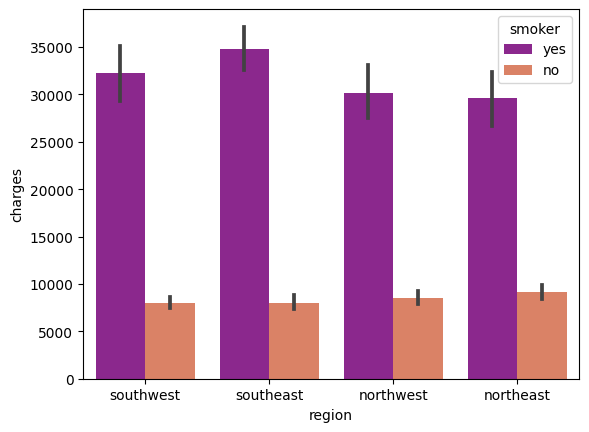

In [9]:
sns.barplot(data = health_insurance, x = 'region', y = 'charges', hue = 'smoker', palette = 'plasma' )

<Axes: xlabel='children', ylabel='charges'>

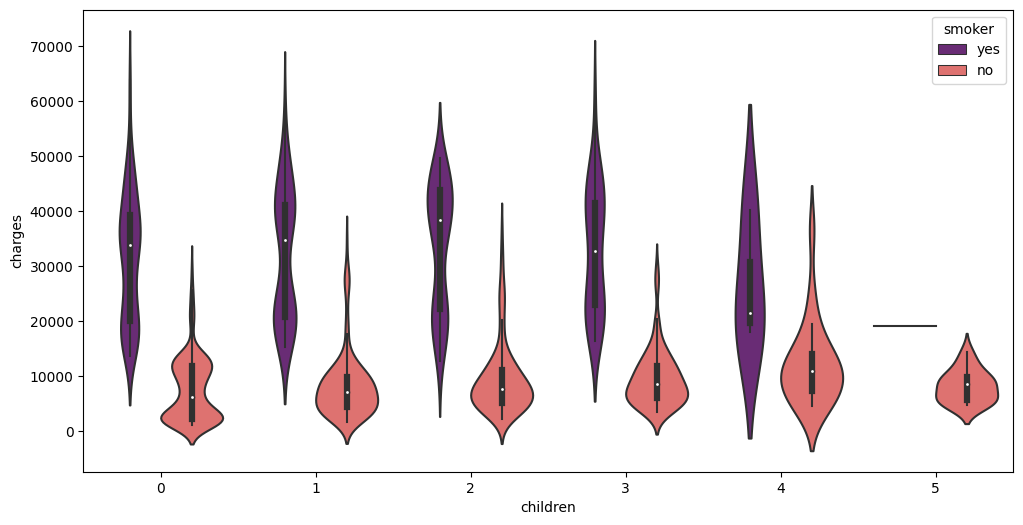

In [10]:
plt.figure(figsize=(12,6))
sns.violinplot(data = health_insurance, x = 'children', y = 'charges', hue = 'smoker', split = False, palette = 'magma')

<Axes: xlabel='region', ylabel='charges'>

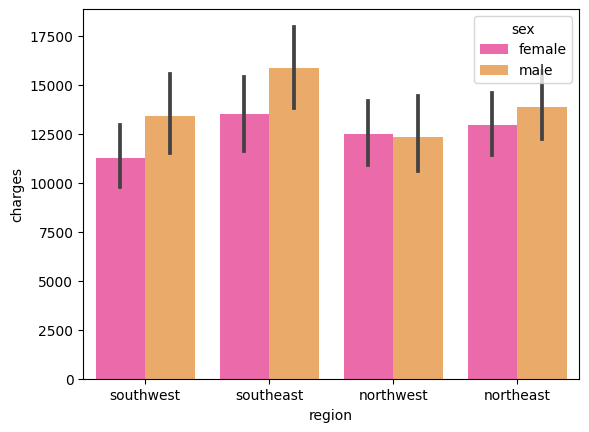

In [11]:
sns.barplot(data = health_insurance, x='region', y='charges', hue='sex', palette='spring')

<Axes: xlabel='region', ylabel='charges'>

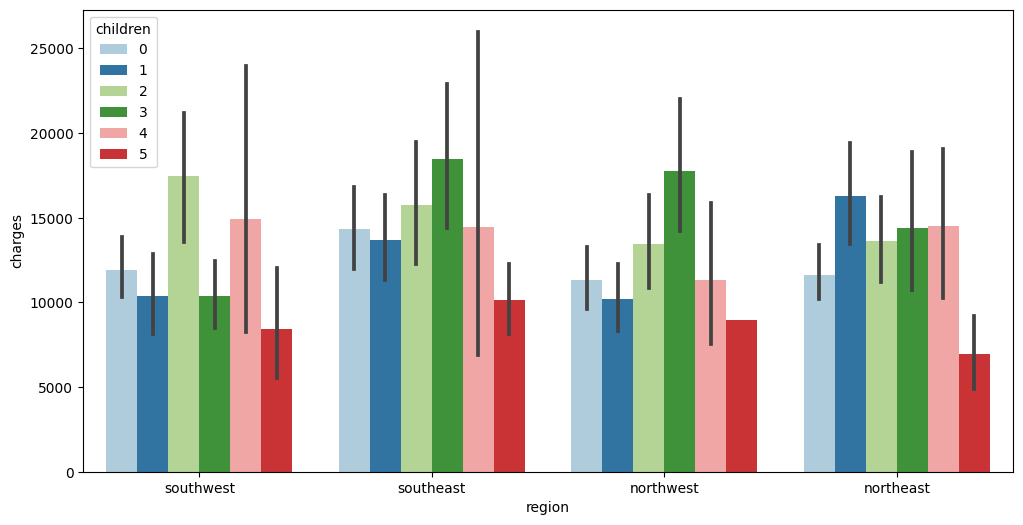

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data = health_insurance, x = 'region', y= 'charges',  hue = 'children', palette='Paired')


# Correlations and Relations

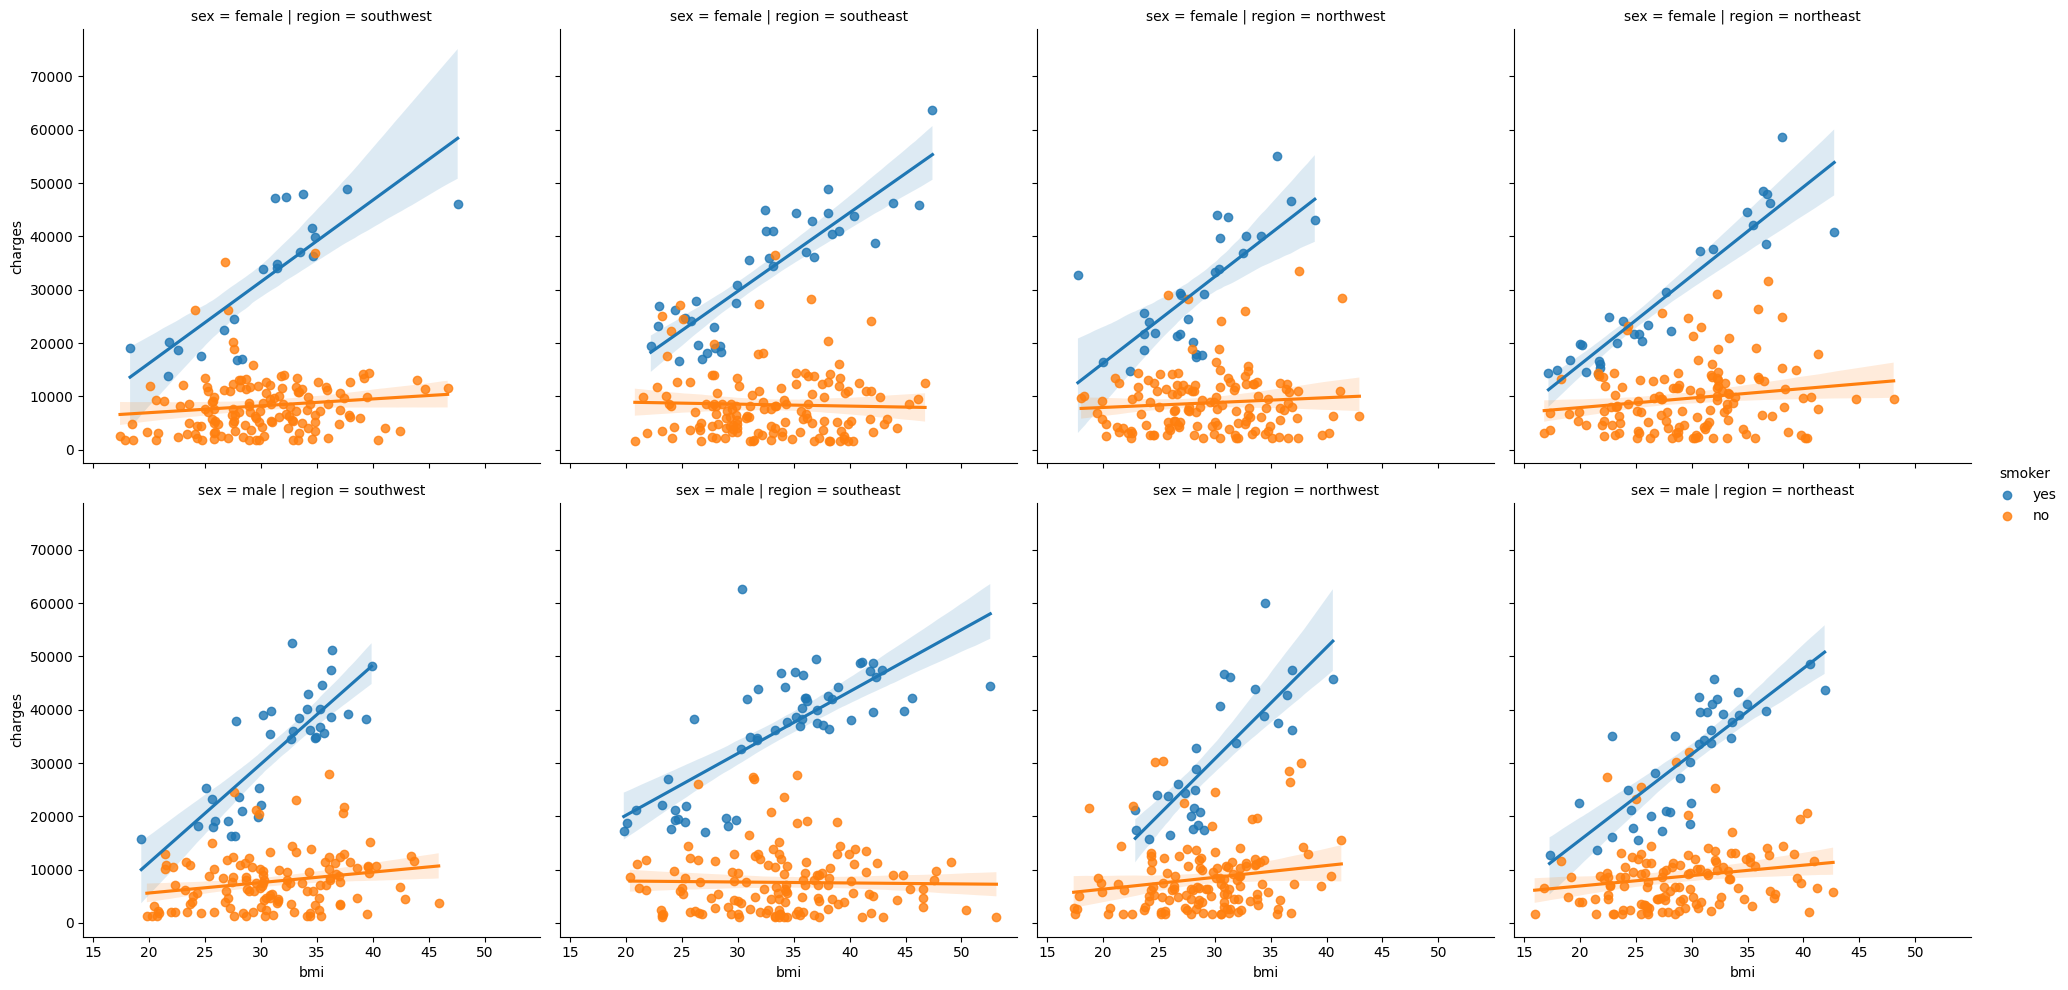

In [13]:
sns.lmplot(x = "bmi", y = "charges", row = "sex", col = "region", hue = 'smoker', data = health_insurance)

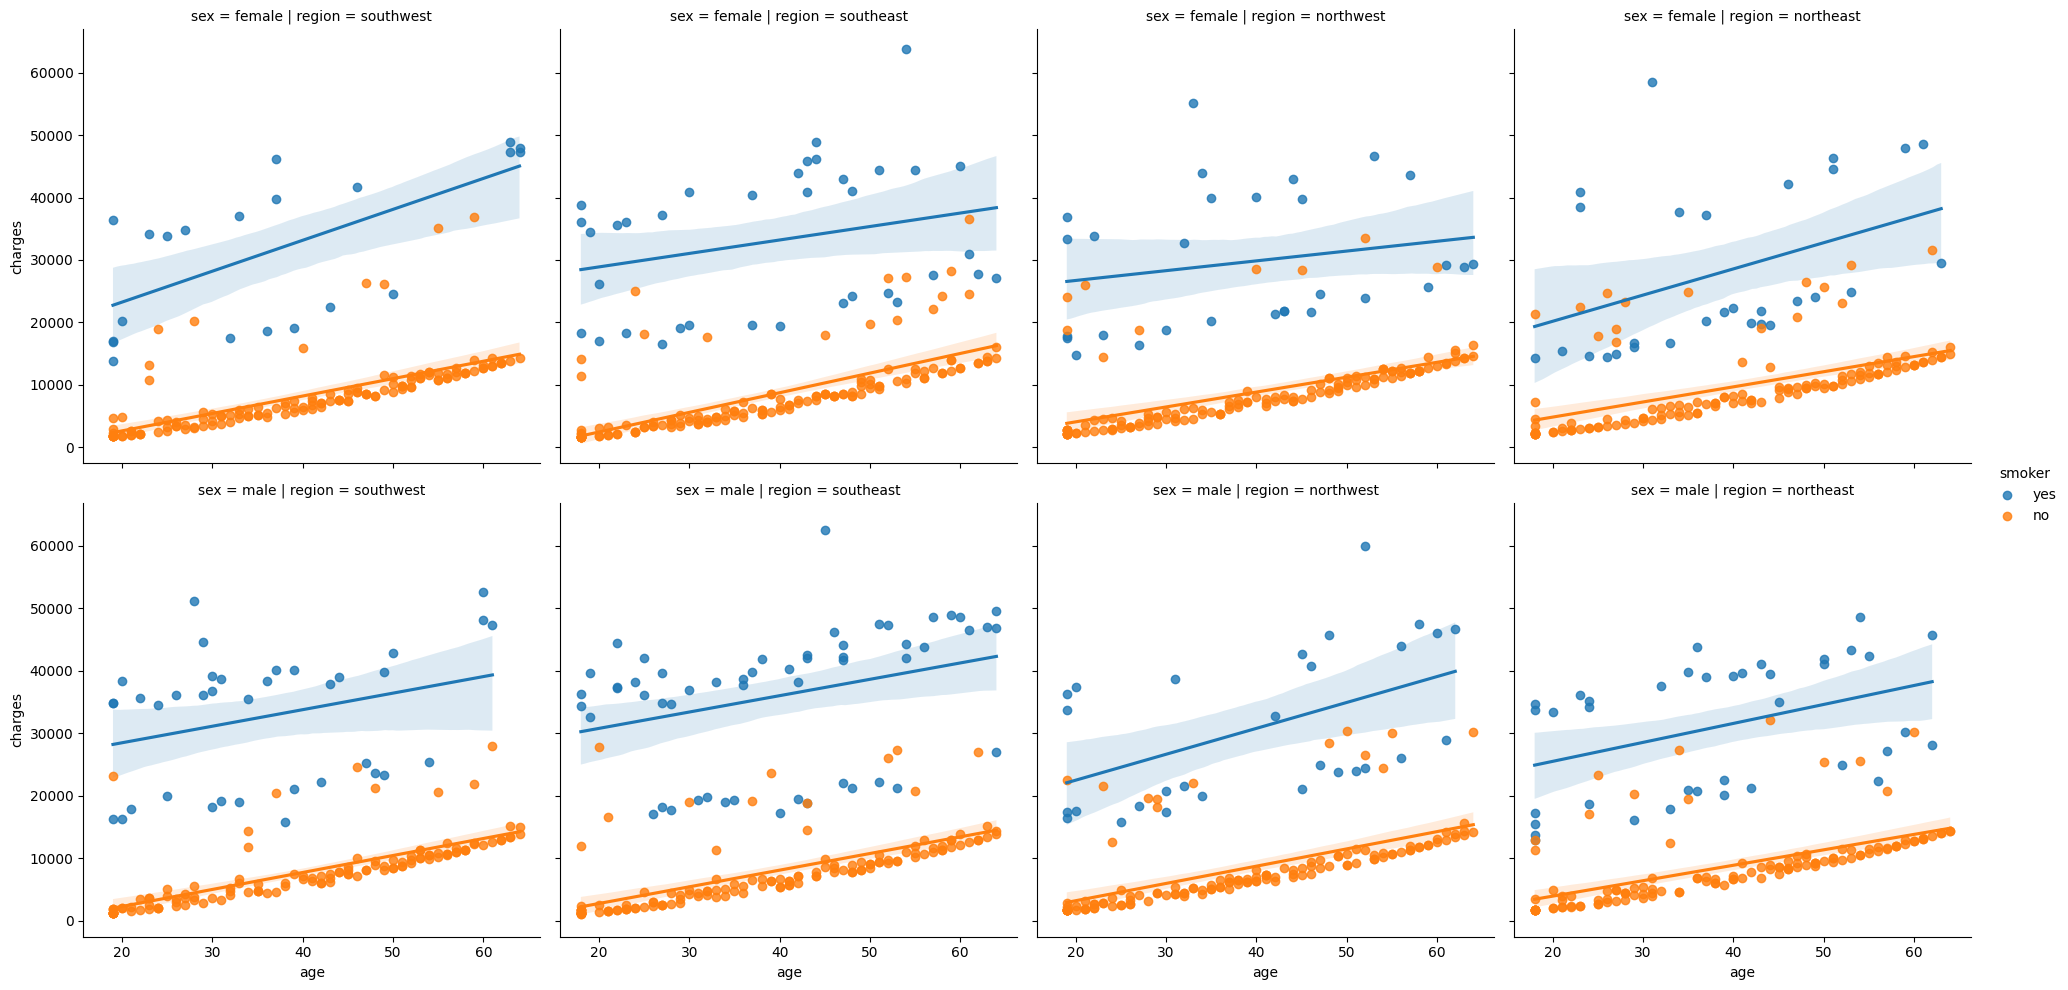

In [14]:
#regression plot to understand the relationship between the Age and Charges considering
sns.lmplot(x = "age", y = "charges", row = "sex", col = "region", hue = 'smoker', data = health_insurance)

In [15]:
# Convert object labels to categorical data type
health_insurance[['sex', 'region', 'smoker']] = health_insurance[['sex', 'region', 'smoker']].astype('category')

# Check the updated data types
print(health_insurance.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [16]:
# Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

label.fit(health_insurance.sex.drop_duplicates())
health_insurance.sex = label.transform(health_insurance.sex)

label.fit(health_insurance.smoker.drop_duplicates())
health_insurance.smoker = label.transform(health_insurance.smoker)

label.fit(health_insurance.region.drop_duplicates())
health_insurance.region = label.transform(health_insurance.region)

In [17]:
health_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

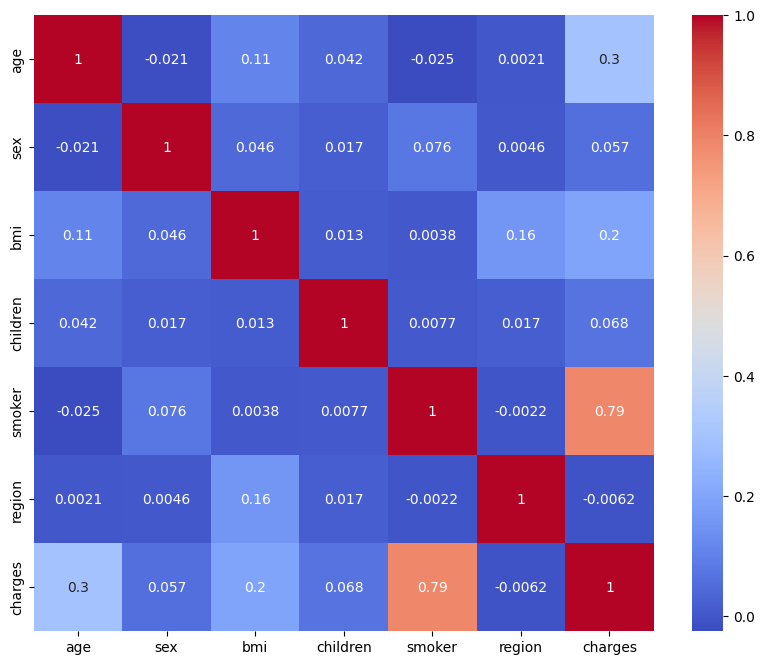

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(health_insurance.corr(),cmap='coolwarm',annot=True)

# Model Building

In [19]:
x = health_insurance.drop(['charges'], axis = 1)
y = health_insurance['charges']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
# !pip install statsmodels


import statsmodels.api as sm #WE GET THE STATISTICAL MODEL
#add constant to predictor variables
x2 = sm.add_constant(x_train)
#fit linear regression model
model = sm.OLS(y_train, x2).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.71e-308
Time:                        09:56:57   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10.991      0.000   -1.41e+04   -9813.820
age          257.0563     13.452     19.109      0.000     230.661     283.451
sex          -18.7915    375.770     -0.050      0.960    -756.126     718.543
bmi          335.7815     31.655     10.607      0.000     273.668     397.895
children     425.0915    154.431      2.753      0.006     122.067     728.116
smoker      2.365e+04    465.245     50.829      0.000    2.27e+04    2.46e+04
region      -271.2843    170.373     -1.592      0.112    -605.590      63.022
==============================================================================
Omnibus:                      251.823   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.548
Skew:                           1.251   Prob(JB):                    1.60e-133
Kurtosis:                       5.731   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression()

In [27]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263045
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [29]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [30]:
#Model Prediction
y_pred1 = lm.predict(x_test)

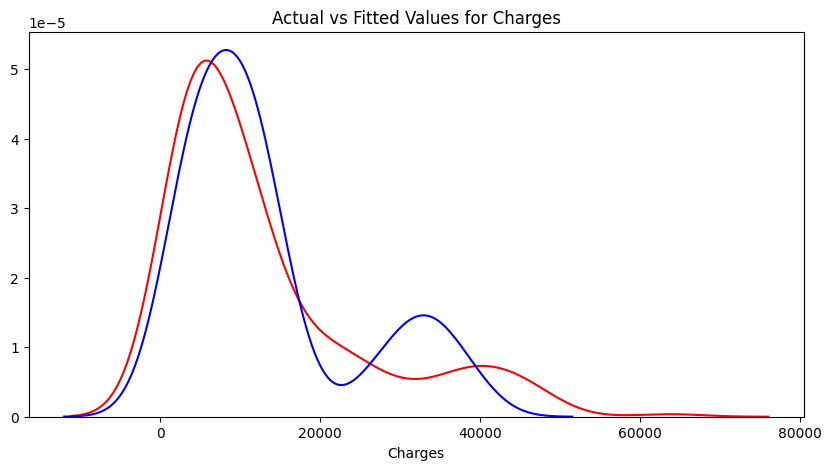

In [31]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

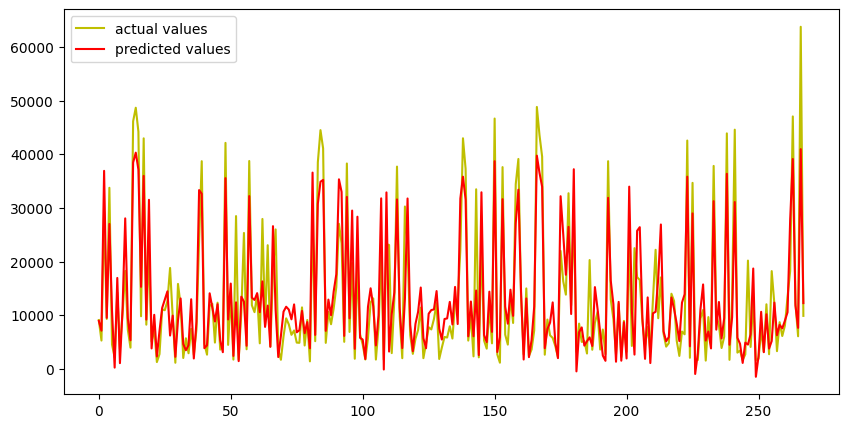

In [34]:
plt.figure(figsize=(10, 5))
# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='y', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],y_pred1, c='r',label="predicted values")
plt.legend()
plt.show()

In [36]:
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008


# Lasso Regression Model

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [38]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKF
#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)
#fit model
lasso_model.fit(x_train, y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        n_jobs=-1)

In [39]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263045
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [40]:
#WE PREDICT OUR LASSOCV REGRESSION MODEL
y_pred2 = lasso_model.predict(x_test)

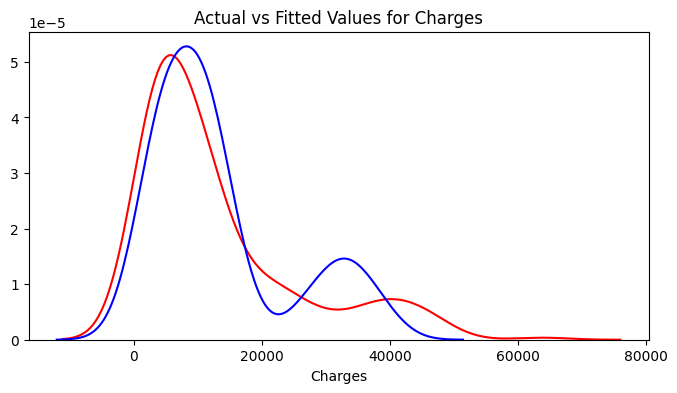

In [41]:
# Visualising the Lasso Regression results
plt.figure(figsize=(8, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [42]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

,Actual,Predicted
764,9095.06825,8911.659191
887,5272.17580,7123.036794
890,29330.98315,36852.479165
1293,9301.89355,9515.428284
259,33750.29180,26976.771303


# Ridge Regression Model

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [44]:
#define cross-validation method to evaluate model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)

#define model
rid_model = RidgeCV(alphas=(0.1,  1.0,  10.0), cv=cv, scoring='neg_mean_absolute_error')
#fit model
rid_model.fit(x_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        scoring='neg_mean_absolute_error')

In [45]:
print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(x_test, y_test))

-11943.45585866969
[ 2.57035723e+02 -1.80109296e+01  3.35782790e+02  4.25136864e+02
  2.36341868e+04 -2.71303705e+02]
0.7833217621706015


In [46]:
y_pred3 = rid_model.predict(x_test)

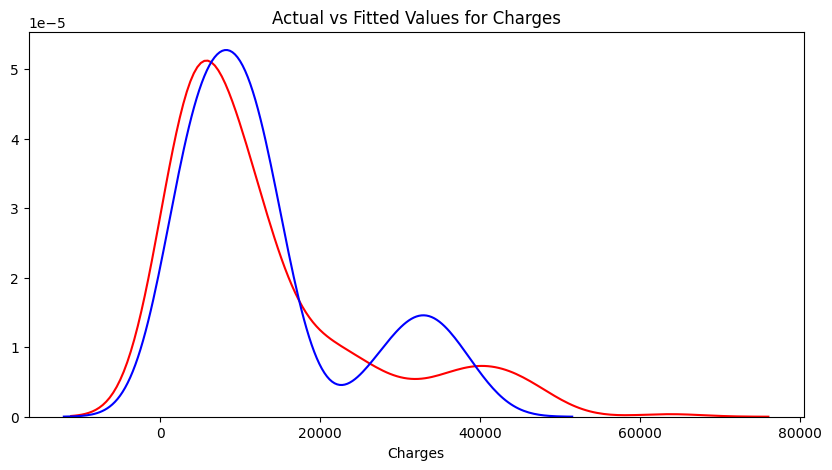

In [47]:
# Visualising the Ridge Regression results
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [48]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()

,Actual,Predicted
764,9095.06825,8926.757144
887,5272.17580,7118.725826
890,29330.98315,36897.233767
1293,9301.89355,9511.011287
259,33750.29180,27003.281662


# Elasticnet Regressor

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [50]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
net_model = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, max_iter=1000, random_state=1)

# evaluate model
scores = cross_val_score(net_model, x_train,y_train, scoring='neg_mean_absolute_error', cv=cv)

net_model.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=1)

In [51]:
print(net_model.intercept_)
print(net_model.coef_)
print(net_model.score(x_test, y_test))

-11626.875213341189
[  254.98398073    56.64093616   335.90294961   429.44085068
 22273.01597223  -273.05052278]
0.7789260673175409


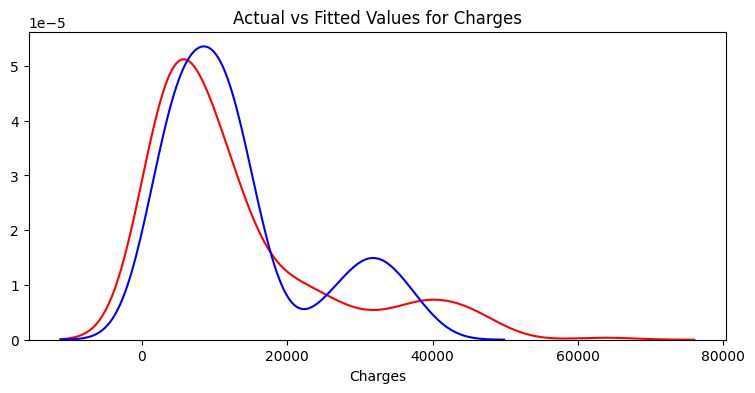

In [52]:
y_pred4 = net_model.predict(x_test)
# Visualising the ElasticNet Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [53]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predicted4.head()

,Actual,Predicted
764,9095.06825,9162.642377
887,5272.17580,7363.304117
890,29330.98315,35722.815803
1293,9301.89355,9822.122303
259,33750.29180,25996.448958


# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
Ram_reg = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2)
# fit the regressor model
Ram_reg.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
print(Ram_reg.score(x_test, y_test))

0.8651056479870664


In [57]:
y_pred5 = Ram_reg.predict(x_test)

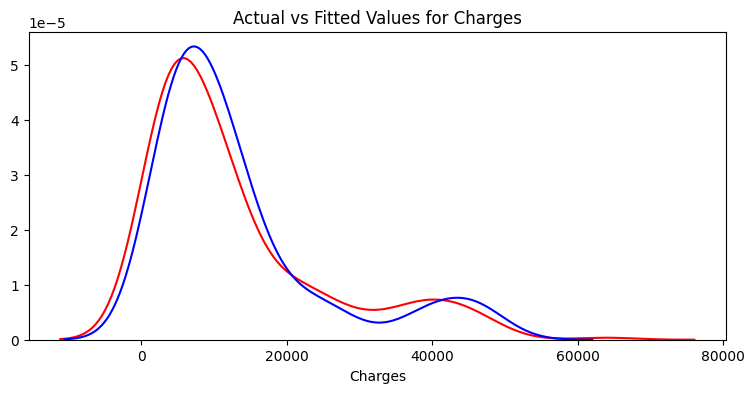

In [58]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [59]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
predicted5.head()

,Actual,Predicted
764,9095.06825,10569.243349
887,5272.17580,5173.140074
890,29330.98315,28323.204206
1293,9301.89355,10320.211062
259,33750.29180,34564.064184


# Best Model Selection

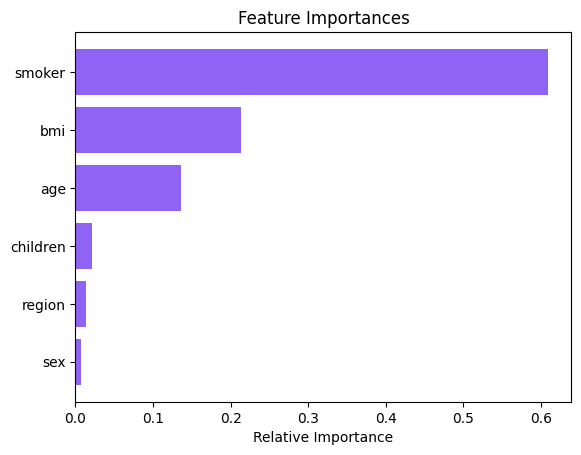

In [60]:
features = x.columns
importances = Ram_reg.feature_importances_
indices = np.argsort(importances)



plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
x = health_insurance.drop(['charges', 'region', 'sex'], axis = 1)
y = health_insurance['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [63]:
x

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


# POLYNOMIAL REGRESSION MODEL

In [64]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree=2)

x_poly = poly_reg.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 0)

In [65]:
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

LinearRegression()

In [66]:
print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(x_test, y_test))

-5325.8817052531285
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345227


In [67]:
y_pred6 = pol_reg.predict(x_test)

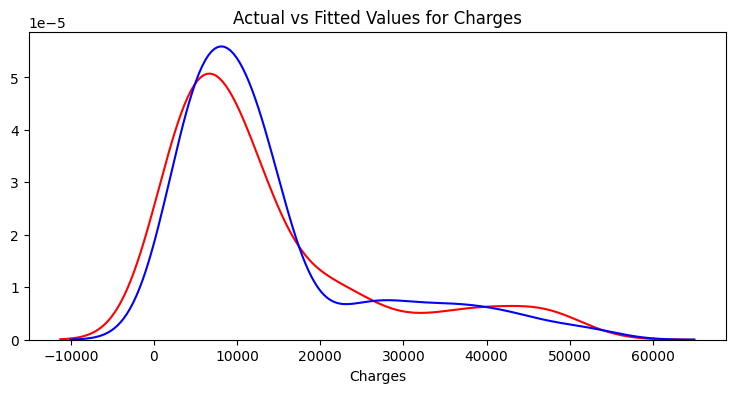

In [68]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred6, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

# Model Evaluation

In [69]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 10976.930324159583
Mean Square Error: 225340349.96269003
Root Mean Square Error: 15011.340711698273


# Lassocv Regression

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 10968.76909663481
Mean Square Error: 224915279.38457984
Root Mean Square Error: 14997.17571359954


# Ridgecv Regression

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 10975.462165520717
Mean Square Error: 225254498.69396165
Root Mean Square Error: 15008.480892280926


# Elasticnet Regression

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 10838.727060068726
Mean Square Error: 216982294.5125357
Root Mean Square Error: 14730.31888699412


# Random Forest Regressor

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 11495.687393867818
Mean Square Error: 267113978.7300161
Root Mean Square Error: 16343.62195873412


# Polynomial Regression

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 2824.495045477652
Mean Square Error: 18895160.098780397
Root Mean Square Error: 4346.856346692446
